## 1. Load Required Libraries

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import src.util as utils
import pandas as pd
import numpy as np

## 2. Load Configuration File

In [5]:
config = utils.load_config()

## 3. Load Train Set

In [6]:
X_train = utils.pickle_load(config["train_set_path"][0])
y_train = utils.pickle_load(config["train_set_path"][1])

In [7]:
train_set = pd.concat([X_train, y_train], axis = 1)

In [8]:
train_set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
323,13,152,90,33,29,26.8,0.731,43,1
448,0,104,64,37,64,33.6,0.510,22,1
84,5,137,108,0,0,48.8,0.227,37,1
529,0,111,65,0,0,24.6,0.660,31,0
329,6,105,70,32,68,30.8,0.122,37,0
...,...,...,...,...,...,...,...,...,...
327,10,179,70,0,0,35.1,0.200,37,0
57,0,100,88,60,110,46.8,0.962,31,0
112,1,89,76,34,37,31.2,0.192,23,0
751,1,121,78,39,74,39.0,0.261,28,0


## 4. Data Exploration

### 4.1 Check Imbalance Label

[Text(0, 0, '350'), Text(0, 0, '187')]

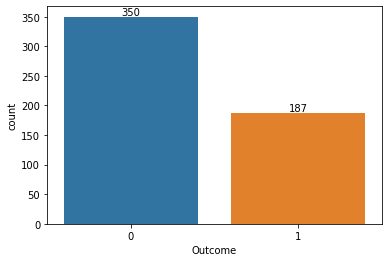

In [9]:
# Check distribution target
ax = sns.countplot(data = train_set, x = "Outcome", label = train_set["Outcome"].unique())
ax.bar_label(ax.containers[0])

In [10]:
# Class 0 is more than twice as much as class 1
# So, we need to balancing it (Undersample, Oversample, or SMOTE)

### 4.2 Predictors Distribution

### 4.3 Boxplot of Feature

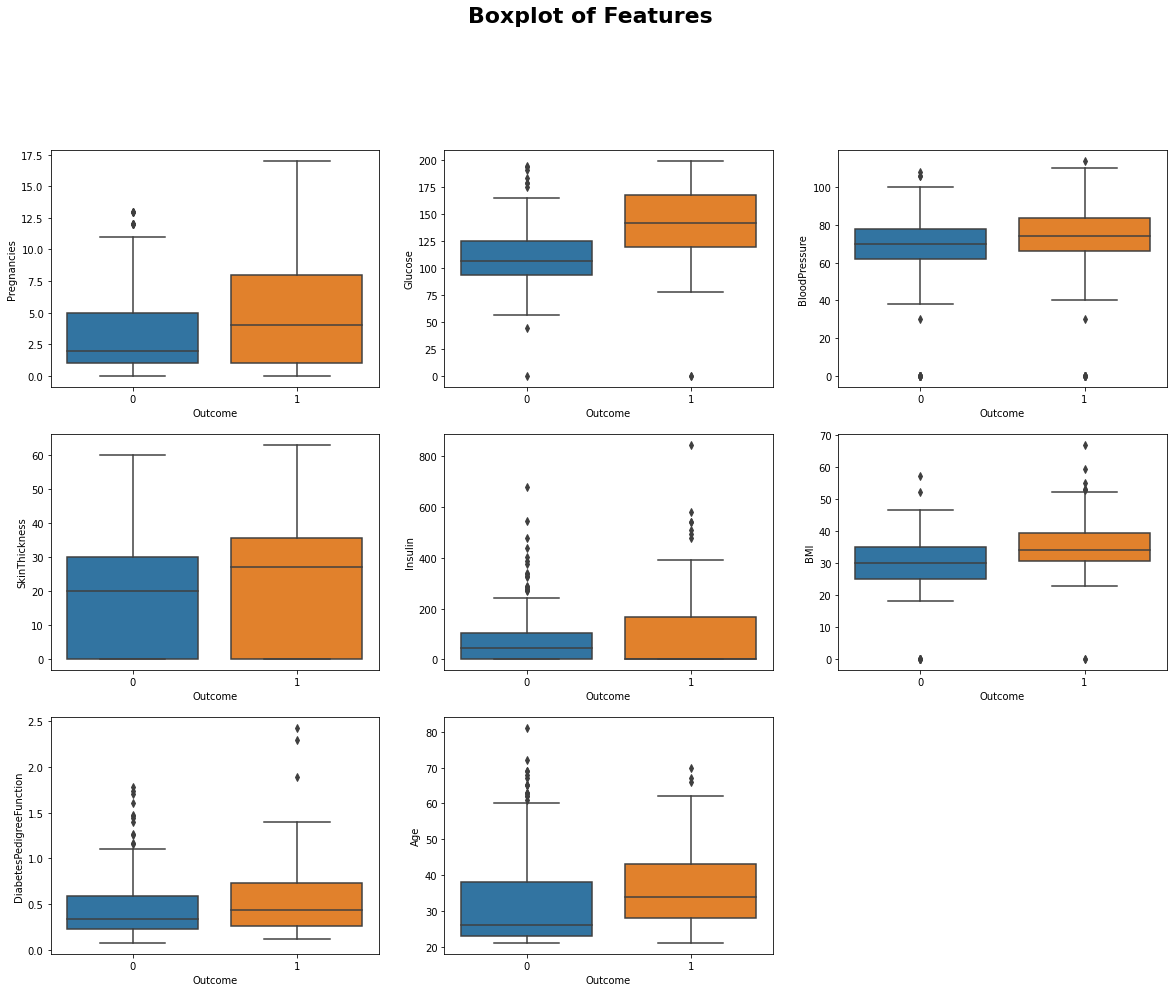

In [35]:
index = 0
plt.figure(figsize=(20, 20))
for feature in train_set.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='Outcome', y=feature, data=train_set)
        plt.suptitle('Boxplot of Features', size = 22, weight='bold')

Text(0.5, 1.08, ' Distribution of features ')

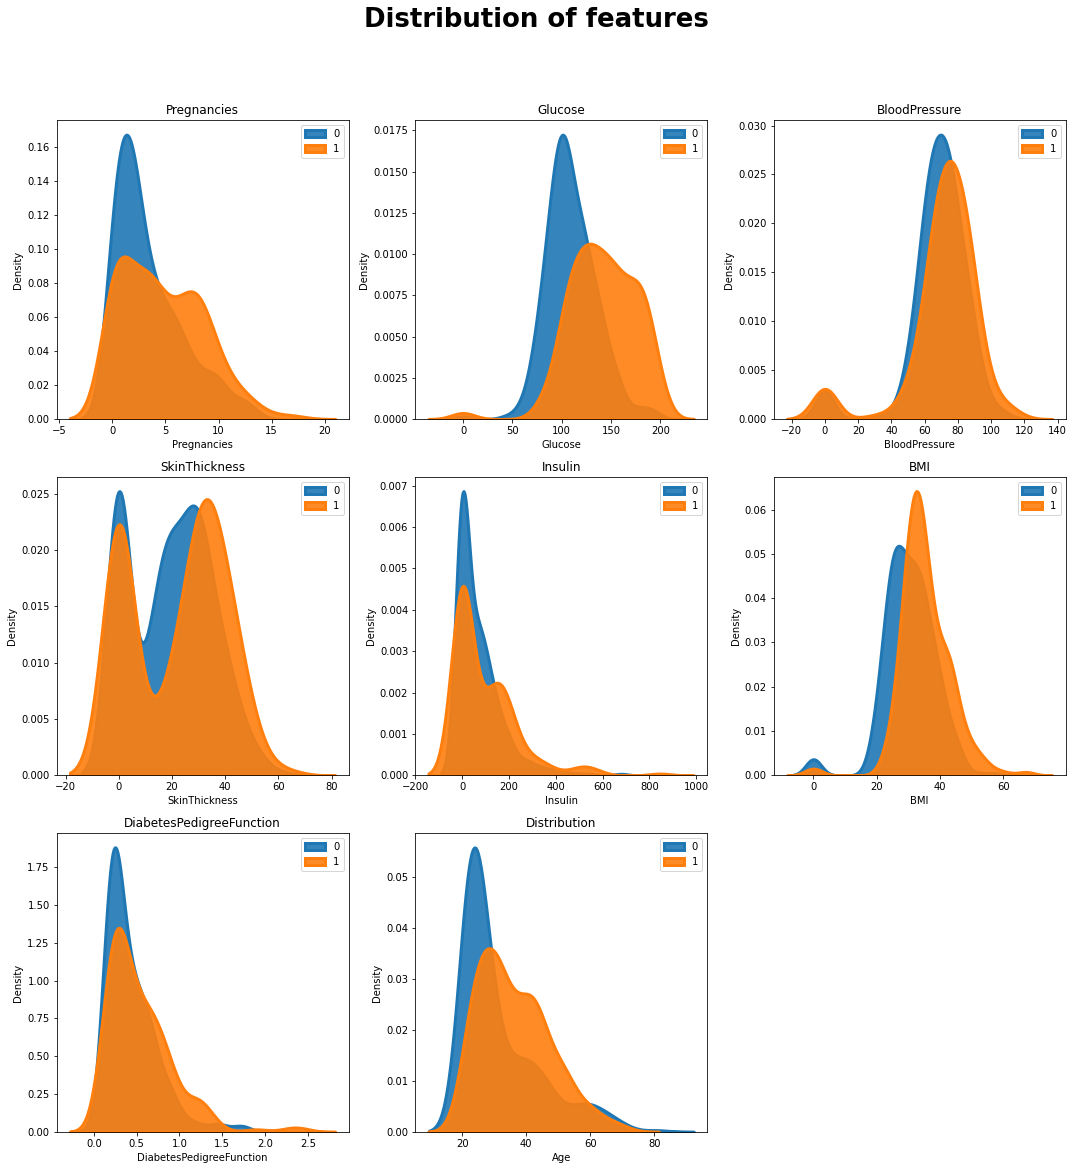

In [32]:
non_diabetes = train_set.query("Outcome == 0")
diabetes = train_set.query("Outcome == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(train_set.columns[:8]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    plotting = sns.kdeplot(x = non_diabetes[col], label = "0",fill=True, common_norm=False, alpha=.9, linewidth=3)
    plotting = sns.kdeplot(x = diabetes[col], label = "1",fill=True, common_norm=False, alpha=.9, linewidth=3)
    plt.legend()
plt.tight_layout()
plt.title('Distribution')
plotting.figure.suptitle(' Distribution of features ',y=1.08, size = 26, weight='bold')

Text(0.5, 1.08, 'Feature Diabetes')

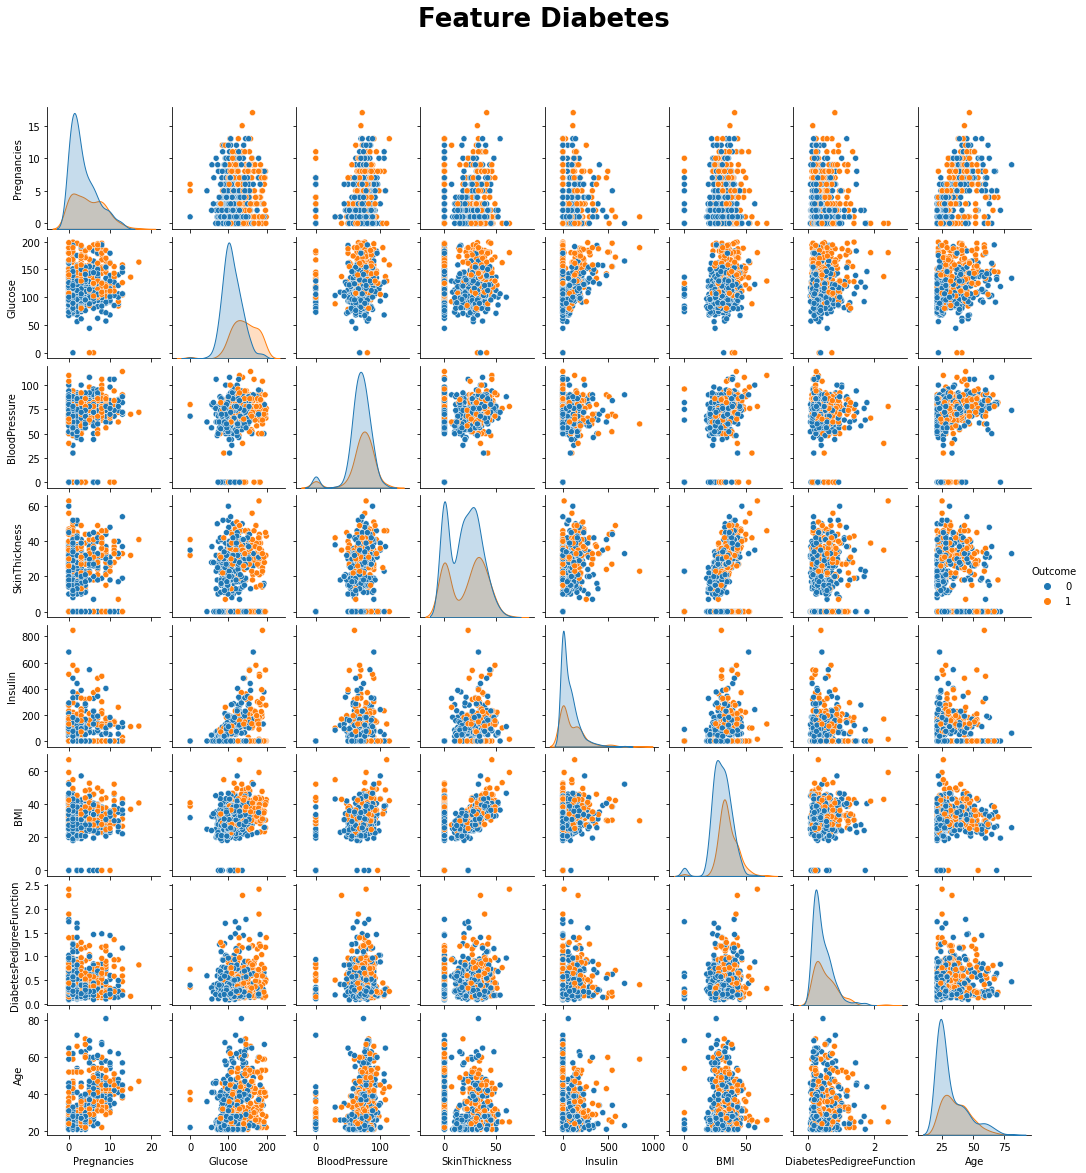

In [22]:
ax = sns.pairplot(train_set ,hue = "Outcome", diag_kind = "kde",kind = "scatter")
ax.fig.set_size_inches(15,15)
ax.fig.suptitle('Feature Diabetes',y=1.08, size = 26, weight='bold')

Text(0.5, 1.0, 'Correlation of Features')

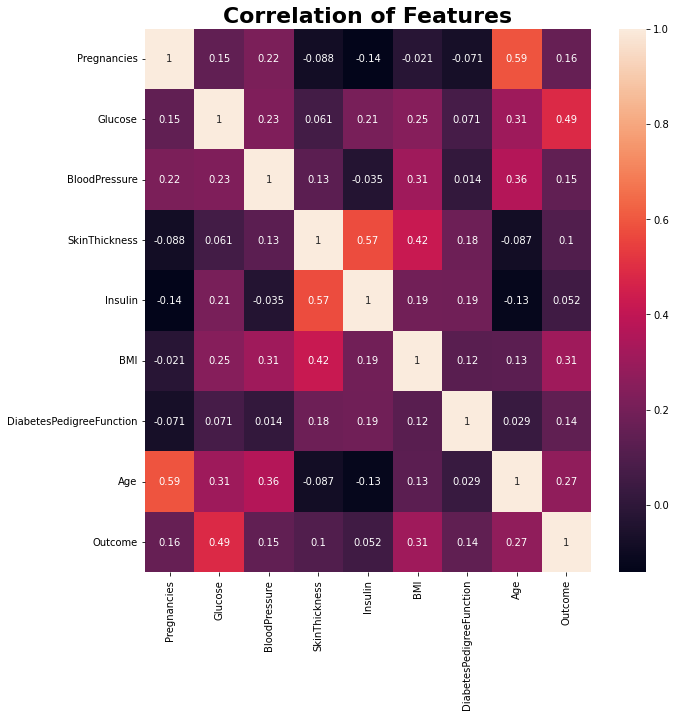

In [26]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(train_set.corr(method = "spearman"), annot = True, ax = ax)

ax.set_title('Correlation of Features', size = 22, weight='bold')
